In [1]:
import transformers
transformers.__version__

/opt/conda/lib/python3.10/site-packages/transformers/utils/generic.py:441: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(


'4.35.0'

In [2]:
# !pip install transformers==4.35.0
# !pip install tensorflow==2.15.0

In [3]:
transformers.__version__

'4.35.0'

In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
sns.set(style='whitegrid')
import nltk
nltk.download('omw-1.4')
# generics
import pandas as pd
import numpy as np
import random

# visu
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
# import krono

# texts
import re
import unicodedata
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical, plot_model

# Model
from tensorflow.keras import layers, Sequential
from tensorflow.keras.callbacks import EarlyStopping

# NLTK
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn import metrics

from collections import defaultdict
from collections import Counter

import re
import gensim
import string

from tqdm import tqdm
from keras.preprocessing.text import Tokenizer
#from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.sequence import pad_sequences

from keras.models import Sequential
from keras.layers import Embedding, LSTM,Dense, SpatialDropout1D, Dropout
from keras.initializers import Constant
from tensorflow.keras.layers import Input, Dropout, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import TruncatedNormal
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from transformers import TFBertModel,  BertConfig, BertTokenizerFast
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, MaxPool2D, Conv2D, Flatten
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn import metrics



import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
import warnings
warnings.simplefilter('ignore')

[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...


2024-09-12 11:46:32.841696: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-12 11:46:32.841774: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-12 11:46:32.843902: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


/opt/conda/lib/python3.10/site-packages/transformers/utils/generic.py:309: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(


In [5]:
import tensorflow as tf

tf.__version__


'2.15.0'

In [6]:
print("GPU", "available (Yess!!)" if tf.config.list_physical_devices("GPU") else "not available")

GPU available (Yess!!)


In [7]:
# file_path = '/content/drive/MyDrive/ghosh_train.txt'
# df = pd.read_csv(file_path, delimiter='\t', names=['source', 'sarcastic', 'tweet'])

# # Display the DataFrame
# df

In [8]:
# sarcastic=[]
# df['star_rating']=df['star_rating']

# for i in df['star_rating']:
#   if (i==1):
#     sarcastic.append(0)
#   elif (i==5):
#     sarcastic.append(1)


# print(sarcastic[:100])

In [9]:
# sarcastic_df = pd.DataFrame(sarcastic, columns=['sarcastic']).astype(int)
# df['sarcastic'] = sarcastic_df

In [10]:
# df['sarcastic']

In [11]:
# class_counts = df['sarcastic'].value_counts()

# # Calculate the maximum number of samples among all classes
# max_count = class_counts.min()

# # Create a DataFrame to store balanced data
# balanced_df = pd.DataFrame(columns=['tweet', 'sarcastic'])

# # Iterate over each class
# for sarcastic, count in class_counts.items():
#     # If the class count is greater than the maximum count, remove extra samples randomly
#     if count > max_count:
#         # Randomly sample rows to keep only the required number of samples
#         sampled_rows = df[df['sarcastic'] == sarcastic].sample(n=max_count, random_state=42)
#         # Append the sampled rows to the balanced DataFrame
#         balanced_df = pd.concat([balanced_df,sampled_rows])
#     else:
#         # If the class count is not greater than the maximum count, keep all samples for that class
#         balanced_df = pd.concat([balanced_df,df[df['sarcastic'] == sarcastic]])

# # Shuffle the balanced DataFrame
# balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)


In [12]:
# balanced_df.sarcastic.value_counts()

In [13]:
# !pip install nxviz

# Modeling

In this step we will build, train and compare the following algorithms:

- RoBERTa (Robustly Optimized BERT Pre-training Approach)


In [14]:
# data = balanced_df[['tweet', 'sarcastic']]

# # Set your model output as categorical and save in new label col
# data['sarcastic_label'] = pd.Categorical(data['sarcastic'])

# # Transform your output to numeric
# data['sarcastic'] = data['sarcastic_label'].cat.codes

Split into train and validation set, as the file contains more than 150 thousand instances we can consider only a small portion of it as validation and still the number is relatively long, because of this we will set the test_size to 10% as follows:

In [15]:
# data_train, data_val = train_test_split(data, test_size = 0.2)
#data_train, data_val, y_train, y_test = train_test_split(data, test_size=0.3, random_state=0, stratify=Severity)


In [16]:
# import pandas as pd
# from sklearn.model_selection import train_test_split

# # Assuming 'data' is your DataFrame
# data_train, data_val = train_test_split(data, test_size=0.2)

# # Save data_train to CSV
# data_train.to_csv('/content/drive/MyDrive/data_train_ghosh.csv', index=False)

# # Save data_val to CSV



In [17]:
# data_val.to_csv('/content/drive/MyDrive/data_val_ghosh.csv', index=False)

In [18]:
# data=pd.read_csv('/content/drive/MyDrive/ghosh_cleaned_train_with_original.csv')
# data
data=pd.read_csv('/kaggle/input/ghoshdata/data_train_ghosh.csv')
data

,tweet,sarcastic,sarcastic_label
0,Thank you guys for tuning in with and for all ...,0,0
1,"@realDonaldTrump @FoxNews Juan Williams, get o...",1,1
2,"Harbaugh says "" I truly believe "" Rudock -Butt...",0,0
3,I knew it ! I never doubted you for a second G...,0,0
4,Knowing every word to Mean Girls #Not #BadPage...,1,1
...,...,...,...
39119,already can't wait to come home from class tom...,0,0
39120,Fixing my favorite meal ... beanie weanies 😂 b...,1,1
39121,*puts lmao after I'm done expressing my feelin...,1,1
39122,TOTD : The grass is greener where you water it .,0,0


In [19]:
data_train, data_val = train_test_split(data, test_size = 0.2)

In [20]:
# data_test=pd.read_csv('/content/drive/MyDrive/ghosh_cleaned_val_with_original.csv')
# data_test
data_test=pd.read_csv('/kaggle/input/ghoshdata/data_val_ghosh.csv')
data_test

,tweet,sarcastic,sarcastic_label
0,Go to EDCLV this year with my class or wait ti...,1,1
1,I just told someone that I have to pee pee . I...,1,1
2,I do what I want . #Rebel,0,0
3,Thinking about waking up early for a run . Mos...,1,1
4,now whoever tries to call you on your bullshit...,0,0
...,...,...,...
9777,Kayla is in the other room and I can here her ...,0,0
9778,I got locked out of my pickup and had to pay h...,1,1
9779,Don't Care What Happens To Your Boarding Pass ...,0,0
9780,are you trying to fool me with those bullshits...,0,0


In [21]:
# k['sarcastic'].value_counts()

In [22]:
# import re

# def clean_tweet_data(text):
#     # Remove mentions
#     without_mentions = [word for word in text.split() if '@' not in word]
#     text = " ".join(without_mentions)

#     # Remove hashtags
#     without_hashtags = [word for word in text.split() if '#' not in word]
#     text = " ".join(without_hashtags)

#     # Remove links
#     without_links = [word for word in text.split() if 'https' not in word]
#     text = " ".join(without_links)

#     # Remove emojis
#     def deEmojify(text):
#         regrex_pattern = re.compile(pattern = "["
#             u"\U0001F600-\U0001F64F"  # emoticons
#             u"\U0001F300-\U0001F5FF"  # symbols & pictographs
#             u"\U0001F680-\U0001F6FF"  # transport & map symbols
#             u"\U0001F1E0-\U0001F1FF"  # flags
#             u"\U00002702-\U000027B0"
#             u"\U000024C2-\U0001F251"
#             u"\U0001f926-\U0001f937"
#             u"\U00010000-\U0010ffff"
#             u"\u2640-\u2642"
#             u"\u2600-\u2B55"
#             u"\u200d"
#             u"\u23cf"
#             u"\u23e9"
#             u"\u231a"
#             u"\ufe0f"  # dingbats
#             u"\u3030"
#                     "]+", flags = re.UNICODE)
#         return regrex_pattern.sub(r'', text)

#     text = deEmojify(text)

#     return text

# # Example usage for cleaning an entire dataset
# data_train['tweet'] = data_train['tweet'].apply(clean_tweet_data)
# data_val['tweet'] = data_val['tweet'].apply(clean_tweet_data)
# data_test['tweet'] = data_test['tweet'].apply(clean_tweet_data)


In [23]:
!pip install emoji

In [24]:
abbreviations = {
    "$" : " dollar ",
    "€" : " euro ",
    "4ao" : "for adults only",
    "a.m" : "before midday",
    "a3" : "anytime anywhere anyplace",
    "aamof" : "as a matter of fact",
    "acct" : "account",
    "adih" : "another day in hell",
    "afaic" : "as far as i am concerned",
    "afaict" : "as far as i can tell",
    "afaik" : "as far as i know",
    "afair" : "as far as i remember",
    "afk" : "away from keyboard",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "asl" : "age, sex, location",
    "atk" : "at the keyboard",
    "ave." : "avenue",
    "aymm" : "are you my mother",
    "ayor" : "at your own risk",
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business",
    "b2c" : "business to customer",
    "b4" : "before",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbc" : "british broadcasting corporation",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "be4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",
    "cya" : "see you",
    "cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart",
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lmfao" : "laugh my fucking ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mf" : "motherfucker",
    "mfs" : "motherfuckers",
    "mfw" : "my face when",
    "mofo" : "motherfucker",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    "pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    "qpsa" : "what happens", #"que pasa",
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rlrt" : "real life retweet",
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
    "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously",
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "today i learned",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "zzz" : "sleeping bored and tired"
}


In [25]:
def replace_abbreviations(text):
    if isinstance(text, str):  # Check if text is not NaN
        words = text.split()
        replaced_words = [abbreviations.get(word, word) for word in words]
        return ' '.join(replaced_words)
    else:
        return text

# Apply the function to 'comment' and 'parent_comment' columns
data_train['tweet'] = data_train['tweet'].apply(replace_abbreviations)
data_val['tweet'] = data_val['tweet'].apply(replace_abbreviations)
data_test['tweet'] = data_test['tweet'].apply(replace_abbreviations)
# x['parent_comment'] = x['parent_comment'].apply(replace_abbreviations)

# Display the modified DataFrame
# x

In [26]:
import emoji
def expand_emojis(text):
    return emoji.demojize(text) if emoji.emoji_count(text) > 0 else text

# Apply expand_emojis to the 'comment' and 'parent_comment' columns, handling missing values
data_train['tweet'] = data_train['tweet'].apply(lambda x: expand_emojis(str(x)) if isinstance(x, str) else x)
data_val['tweet'] = data_val['tweet'].apply(lambda x: expand_emojis(str(x)) if isinstance(x, str) else x)
data_test['tweet'] = data_test['tweet'].apply(lambda x: expand_emojis(str(x)) if isinstance(x, str) else x)

# data['parent_comment'] = data['parent_comment'].apply(lambda x: expand_emojis(str(x)) if isinstance(x, str) else x)

# Display the modified dataset
# print(x)

In [27]:
import re

def clean_tweet(text):
    # Remove emojis
#     emoji_pattern = re.compile("["
#                                u"\U0001F600-\U0001F64F"  # emoticons
#                                u"\U0001F300-\U0001F5FF"  # symbols & pictographs
#                                u"\U0001F680-\U0001F6FF"  # transport & map symbols
#                                u"\U0001F1E0-\U0001F1FF"  # flags
#                                u"\U00002702-\U000027B0"
#                                u"\U000024C2-\U0001F251"
#                                u"\U0001f926-\U0001f937"
#                                u"\U00010000-\U0010ffff"
#                                u"\u2640-\u2642"
#                                u"\u2600-\u2B55"
#                                u"\u200d"
#                                u"\u23cf"
#                                u"\u23e9"
#                                u"\u231a"
#                                u"\ufe0f"  # dingbats
#                                u"\u3030"
#                                "]+", flags=re.UNICODE)
#     text = emoji_pattern.sub(r'', text)

    # Remove links
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove hashtags
    text = re.sub(r'#\w+', '', text)

    # Remove mentions
    text = re.sub(r'@\w+', '', text)

    return text

# Example usage for cleaning entire datasets
data_train['tweet'] = data_train['tweet'].apply(clean_tweet)
data_val['tweet'] = data_val['tweet'].apply(clean_tweet)
data_test['tweet'] = data_test['tweet'].apply(clean_tweet)


In [28]:
data_train

,tweet,sarcastic,sarcastic_label
38552,"give it a rest, the only poisoning is from th...",0,0
16129,"Everybody's tired of someone , our eyes wander...",0,0
11279,Ah lucky today is the only day i actually didn...,1,1
38761,Nothing like rolling thru white ass Lyndhurst ...,1,1
28610,Before someone gets their drivers license they...,1,1
...,...,...,...
4004,"Robert Englund , the actor who portrays Freddy...",0,0
13433,"I am disabled and near house-bound , Facebook...",0,0
24697,"i wish "" im tired "" was a valid excuse to stay...",1,1
19445,"*talking to kid I babysit* Me : "" wait .. what...",1,1


In [29]:
data_val

,tweet,sarcastic,sarcastic_label
1338,haha its an old picc though :p,0,0
12437,So fucking classy . :face_with_tears_of_joy:,1,1
8979,I slipped in the kitchen and yelled hella loud...,1,1
465,awesome way to start my day,0,0
26217,An excess of can be dangerous & can lead to a...,0,0
...,...,...,...
36028,SWAVE SEVAH PREDICTS CROWN 2 WINNERS & LO...,0,0
33582,"Still nothing in NYC, NJ and MN terror attack...",0,0
9004,I love it when you're doing math homework and ...,1,1
24703,Happy happy happy birthday stay happy hehehe ...,0,0


In [30]:
data_test

,tweet,sarcastic,sarcastic_label
0,Go to EDCLV this year with my class or wait ti...,1,1
1,I just told someone that I have to pee pee . I...,1,1
2,I do what I want .,0,0
3,Thinking about waking up early for a run . Mos...,1,1
4,now whoever tries to call you on your bullshit...,0,0
...,...,...,...
9777,Kayla is in the other room and I can here her ...,0,0
9778,I got locked out of my pickup and had to pay h...,1,1
9779,Don't Care What Happens To Your Boarding Pass ...,0,0
9780,are you trying to fool me with those bullshits...,0,0


In [31]:
data_train.sarcastic.value_counts()

sarcastic
0    15673
1    15626
Name: count, dtype: int64

In [32]:
data_val.sarcastic.value_counts()

sarcastic
1    3922
0    3903
Name: count, dtype: int64

In [33]:
es = EarlyStopping(patience=5, monitor='val_accuracy', restore_best_weights=True)

In [34]:
#y_test_array =pd.get_dummies(y_val_actual_max, drop_first=False).values #np.asarray(y_val_actual_max)

#y_score = np.asarray(y_val_pred_max)

# RoBERTa

In [35]:
import transformers
transformers.__version__

'4.35.0'

In [36]:
# !pip install transformers==4.35.0

In [37]:
transformers.__version__

'4.35.0'

In [38]:
from transformers import RobertaTokenizer, TFRobertaModel, RobertaConfig

In [39]:
strategy = tf.distribute.MirroredStrategy()
print('DEVICES AVAILABLE: {}'.format(strategy.num_replicas_in_sync))

DEVICES AVAILABLE: 2


In [40]:
### --------- Setup Roberta ---------- ###
with strategy.scope():
    model_name = 'roberta-base'

    # Max length of tokens
    max_length = 40

    # Load transformers config and set output_hidden_states to False
    config = RobertaConfig.from_pretrained(model_name)
    config.output_hidden_states = False

    # Load Roberta tokenizer
    tokenizer = RobertaTokenizer.from_pretrained(pretrained_model_name_or_path = model_name, config = config)

    # Load the Roberta model
    transformer_roberta_model = TFRobertaModel.from_pretrained(model_name, config = config)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaModel: ['lm_head.bias', 'lm_head.layer_norm.bias', 'roberta.embeddings.position_ids', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.weight']
- This IS expected if you are initializing TFRobertaModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFRobertaModel were not initialized from the PyTorch model and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and infe

In [41]:
from tensorflow.keras.layers import GRU, Input, Dropout, Dense, Flatten
from tensorflow.keras.models import Model
from transformers import TFRobertaModel
from tensorflow.keras.initializers import TruncatedNormal

### ------- Build the model ------- ###
with strategy.scope():
    # Load the MainLayer (assuming transformer_roberta_model is pre-loaded)
    roberta = transformer_roberta_model.layers[0]

    # Build your model input
    input_ids = Input(shape=(max_length,), name='input_ids', dtype='int32')
    inputs = {'input_ids': input_ids}

    # Load the Transformers RoBERTa model as a layer in a Keras model
    roberta_output = roberta(inputs)
    sequence_output = roberta_output[0]

    # Apply dropout (if needed)
    # dropout = Dropout(config.hidden_dropout_prob, name='dropout')(sequence_output)

    # Add the first GRU layer
    gru_output_1 = GRU(units=768, return_sequences=True, kernel_initializer=TruncatedNormal(stddev=config.initializer_range), name='gru_layer_1')(sequence_output)

    # Add the second GRU layer
    gru_output_2 = GRU(units=768, return_sequences=False, kernel_initializer=TruncatedNormal(stddev=config.initializer_range), name='gru_layer_2')(gru_output_1)

    # Flatten the output (if using dense layers later, uncomment this block)
    # flatten = Flatten(name='flatten')(gru_output_2)

    # Add a Dense layer (if using dense layers later, uncomment this block)
    # dense_1 = Dense(units=768, kernel_initializer=TruncatedNormal(stddev=config.initializer_range), activation='relu', name='dense_1')(flatten)

    # Apply another dropout (if using dense layers later, uncomment this block)
    # dropout_2 = Dropout(config.hidden_dropout_prob, name='dropout_2')(dense_1)

    # Add a second Dense layer (if using dense layers later, uncomment this block)
    # dense_2 = Dense(units=768, kernel_initializer=TruncatedNormal(stddev=config.initializer_range), activation='relu', name='dense_2')(dropout_2)

    # Then build your model output
    sarcastics = Dense(units=len(data_train.sarcastic_label.value_counts()),
                       kernel_initializer=TruncatedNormal(stddev=config.initializer_range),
                       activation='softmax',  # Use 'softmax' for multi-class classification
                       name='sarcastic')(gru_output_2)
    outputs = {'sarcastic': sarcastics}

    # And combine it all in a model object
    Robsent = Model(inputs=inputs, outputs=outputs, name='RoBERTa_GRU_MultiClass')

    # Take a look at the model
    Robsent.summary()


Model: "RoBERTa_GRU_MultiClass"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_ids (InputLayer)      [(None, 40)]              0         
                                                                 
 roberta (TFRobertaMainLaye  TFBaseModelOutputWithPo   124645632 
 r)                          olingAndCrossAttentions             
                             (last_hidden_state=(Non             
                             e, 40, 768),                        
                              pooler_output=(None, 7             
                             68),                                
                              past_key_values=None,              
                             hidden_states=None, att             
                             entions=None, cross_att             
                             entions=None)                       
                                            

In [42]:
# # import tensorflow as tf
# # from tensorflow.keras import backend as K

# # def f1_score(y_true, y_pred):
# #     y_pred = K.cast(tf.argmax(y_pred, axis=-1), dtype=tf.float32)
# #     y_true = K.cast(tf.argmax(y_true, axis=-1), dtype=tf.float32)

# #     true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
# #     possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
# #     predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))

# #     precision = true_positives / (predicted_positives + K.epsilon())
# #     recall = true_positives / (possible_positives + K.epsilon())

# #     f1_val = 2 * (precision * recall) / (precision + recall + K.epsilon())
# #     return f1_val


# class F1_score(tf.keras.metrics.Metric):
#     """
#     F1 score metric based on Keras Precision and Recall metrics.
#     """
#     def __init__(self, name = "f1_score", **kwargs):
#         super(F1_score, self).__init__(name = name, **kwargs)

#         self.precision = tf.keras.metrics.Precision()
#         self.recall = tf.keras.metrics.Recall()

#     def update_state(self, y_true, y_pred, sample_weight = None):
#         self.precision.update_state(y_true, y_pred, sample_weight)
#         self.recall.update_state(y_true, y_pred, sample_weight)

#     def reset_states(self):
#         self.precision.reset_states()
#         self.recall.reset_states()

#     def result(self):
#         return 2 / ((1 / self.precision.result()) + (1 / self.recall.result()))

In [43]:
# Convert a specific column to string
# data_train['cleaned_tweet'] = data_train['cleaned_tweet'].astype(str)
# data_val['cleaned_tweet'] = data_val['cleaned_tweet'].astype(str)
# data_test['cleaned_tweet'] = data_test['cleaned_tweet'].astype(str)


In [44]:
### ------- Train the model ------- ###
with strategy.scope():

# Set an optimizer
    optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=8e-05,epsilon=1e-08,decay=0.01,clipnorm=1.0)

    # Set loss and metrics
    loss = {'sarcastic': CategoricalCrossentropy(from_logits = True)}

    # Compile the model
    # Robsent.compile(optimizer = optimizer, loss = loss, metrics = ['accuracy',F1_score()])
    Robsent.compile(optimizer = optimizer, loss = loss, metrics = ['accuracy'])

    # Ready output data for the model
    y_train = to_categorical(data_train['sarcastic'])

    # Tokenize the input (takes some time)
    x_train = tokenizer(
              text=data_train['tweet'].to_list(),
              add_special_tokens=True,
              max_length=max_length,
              truncation=True,
              padding=True,
              return_tensors='tf',
              return_token_type_ids = False,
              return_attention_mask = True,
              verbose = True)

    y_val = to_categorical(data_val['sarcastic'])

    x_val = tokenizer(
              text=data_val['tweet'].to_list(),
              add_special_tokens=True,
              max_length=max_length,
              truncation=True,
              padding=True,
              return_tensors='tf',
              return_token_type_ids = False,
              return_attention_mask = True,
              verbose = True)

    # Fit the model
    history = Robsent.fit(
        x={'input_ids': x_train['input_ids']},
        y={'sarcastic': y_train},
        validation_data=({'input_ids': x_val['input_ids']},{'sarcastic': y_val}),
        batch_size=64,
        epochs=100,
        verbose=1,callbacks=[es])

Epoch 1/100
490/490 [==============================] - 271s 427ms/step - loss: 0.2565 - accuracy: 0.8915 - val_loss: 0.2235 - val_accuracy: 0.9066
Epoch 2/100
490/490 [==============================] - 204s 416ms/step - loss: 0.2087 - accuracy: 0.9120 - val_loss: 0.2103 - val_accuracy: 0.9137
Epoch 3/100
490/490 [==============================] - 204s 416ms/step - loss: 0.1848 - accuracy: 0.9240 - val_loss: 0.2071 - val_accuracy: 0.9158
Epoch 4/100
490/490 [==============================] - 203s 415ms/step - loss: 0.1670 - accuracy: 0.9317 - val_loss: 0.2153 - val_accuracy: 0.9191
Epoch 5/100
490/490 [==============================] - 203s 415ms/step - loss: 0.1523 - accuracy: 0.9375 - val_loss: 0.2327 - val_accuracy: 0.9192
Epoch 6/100
490/490 [==============================] - 203s 414ms/step - loss: 0.1388 - accuracy: 0.9445 - val_loss: 0.2312 - val_accuracy: 0.9178
Epoch 7/100
490/490 [==============================] - 203s 414ms/step - loss: 0.1274 - accuracy: 0.9501 - val_loss: 0

## Evaluate on validation set:

In [45]:
with strategy.scope():

    y_test = to_categorical(data_test['sarcastic'])

    # Tokenize the input (takes some time)
    x_test = tokenizer(
              text=data_test['tweet'].to_list(),
              add_special_tokens=True,
              max_length=max_length,
              truncation=True,
              padding=True,
              return_tensors='tf',
              return_token_type_ids = False,
              return_attention_mask = True,
              verbose = True)

    y_test = to_categorical(data_test['sarcastic'])

    x_test = tokenizer(
              text=data_test['tweet'].to_list(),
              add_special_tokens=True,
              max_length=max_length,
              truncation=True,
              padding=True,
              return_tensors='tf',
              return_token_type_ids = False,
              return_attention_mask = True,
              verbose = True)


In [46]:
with strategy.scope():

    model_eval = Robsent.evaluate(
        x={'input_ids': x_test['input_ids']},
        y={'sarcastic': y_test}
    )

306/306 [==============================] - 20s 65ms/step - loss: 0.2223 - accuracy: 0.9204


In [47]:
with strategy.scope():

    y_val_predicted = Robsent.predict(
        x={'input_ids': x_test['input_ids']},
    )

306/306 [==============================] - 27s 64ms/step


In [48]:
y_val_pred_max=[np.argmax(i) for i in y_val_predicted['sarcastic']]

In [49]:
y_val_actual_max=[np.argmax(i) for i in y_test]

In [50]:
y_test_array =pd.get_dummies(y_val_actual_max, drop_first=False).values #np.asarray(y_val_actual_max)


In [51]:
from sklearn.metrics import classification_report

report = classification_report(y_val_pred_max, y_val_actual_max)

print(report)

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      4450
           1       0.96      0.89      0.92      5332

    accuracy                           0.92      9782
   macro avg       0.92      0.92      0.92      9782
weighted avg       0.92      0.92      0.92      9782



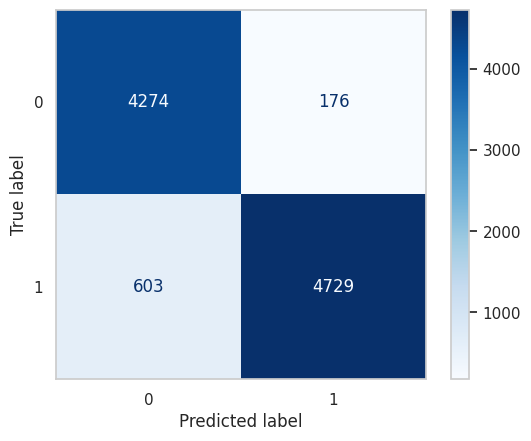

In [52]:
#@title
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_val_pred_max, y_val_actual_max), display_labels=np.unique(y_val_actual_max))
disp.plot(cmap='Blues')
plt.grid(False)

In [53]:
classes=[0,1]

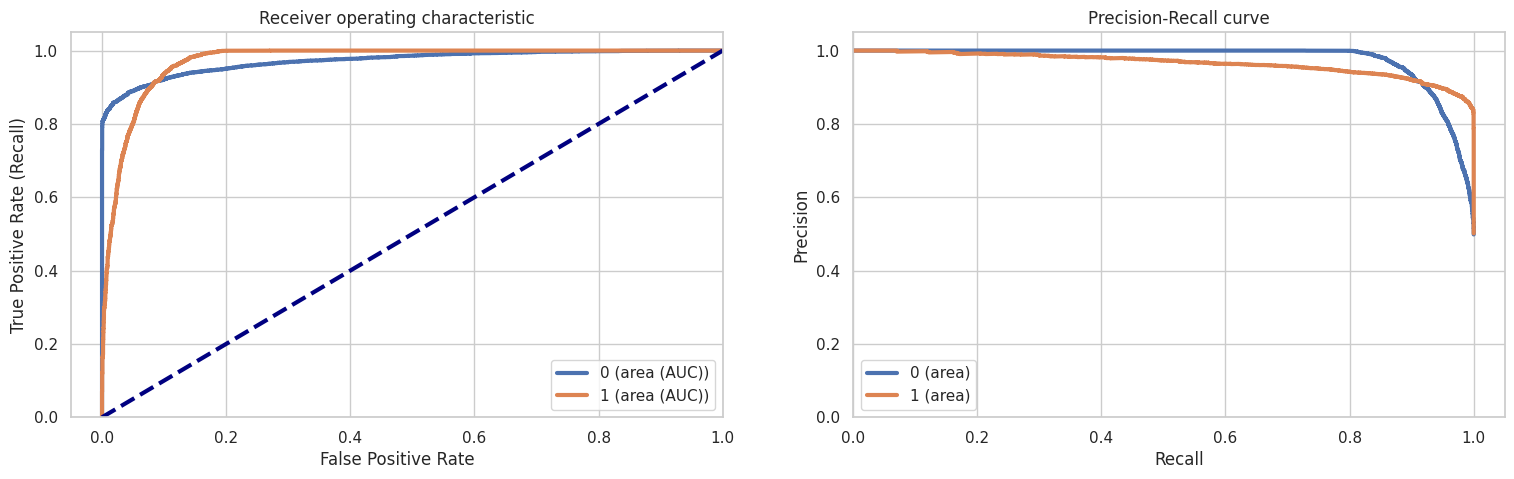

In [54]:
yv=y_val_predicted["sarcastic"]
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(18.5, 5)
## Plot roc
for i in range(len(classes)):
    fpr, tpr, thresholds = roc_curve(y_test_array[:,i],yv[:,i])
    ax[0].plot(fpr, tpr, lw=3,
              #label='{0} (area (AUC) = {1:0.2f})'.format(classes[i], metrics.auc(fpr, tpr))
              label='{0} (area (AUC))'.format(classes[i])

               )
ax[0].plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
ax[0].set(xlim=[-0.05,1.0], ylim=[0.0,1.05],
          xlabel='False Positive Rate',
          ylabel="True Positive Rate (Recall)",
          title="Receiver operating characteristic")
ax[0].legend(loc="lower right")
ax[0].grid(True)

## Plot precision-recall curve
for i in range(len(classes)):
    precision, recall, thresholds = metrics.precision_recall_curve(
                 y_test_array[:,i], yv[:,i])
    ax[1].plot(recall, precision, lw=3,
               #label='{0} (area ={1:0.2f})'.format(classes[i], metrics.auc(recall, precision))
               label='{0} (area)'.format(classes[i])

              )
ax[1].set(xlim=[0.0,1.05], ylim=[0.0,1.05], xlabel='Recall',
          ylabel="Precision", title="Precision-Recall curve")
ax[1].legend(loc="best")
ax[1].grid(True)
plt.show()

In [55]:
# Robsent.save("/content/drive/MyDrive/Robsent_BiGRU2_CNN_f1_score.h5")